In [1]:
import glob
import re
from math import sqrt

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

from utils import Graph

def hit_check(x, y, z, tip_size):
    h = x * 1e-6
    r = sqrt(y**2 + z**2) * 1e-6
    
    if (h - 3.5e-3)**2 + r**2 <= tip_size**2:
        return True
    
    if h <= 3.5e-3 and h <= (3e-3 - 3.5e-3) / (1e-4 - tip_size) * (r - 1e-4) + 3e-3:
        return True
    
    return False

The below three cells show the locations of ionization onset around high ($3.5$ mm) tips with radii of $1$ $\mu$m, $100$ nm, and $10$ nm. For these studies, a cylindrical volume of $r = 10$ $\mu$m and $h = 20$ $\mu$m was used. At various bulk fields, $200$ electrons were spawned and the total number of ionizations was estimated using $2^{\bar{N}}$.

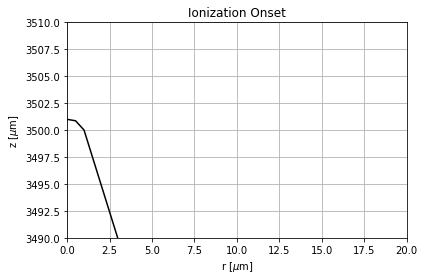

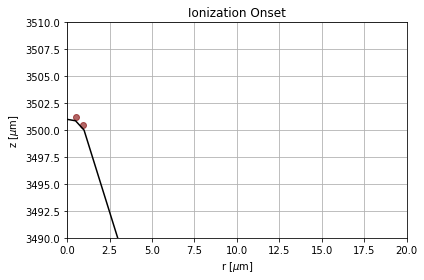

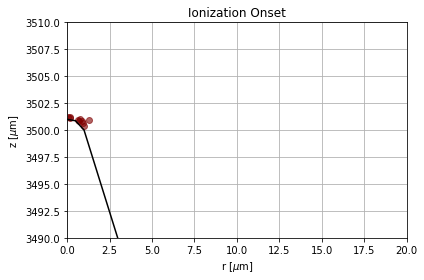

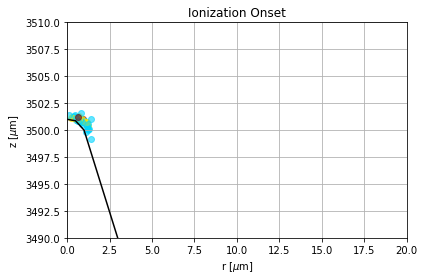

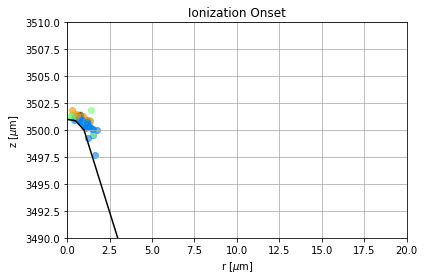

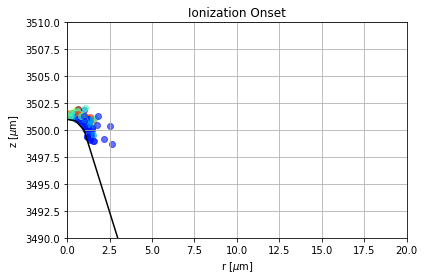

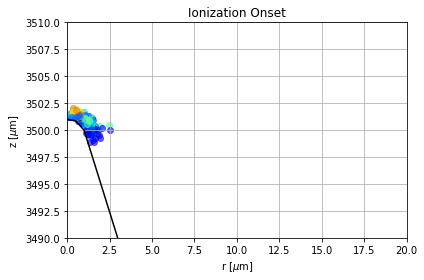

In [2]:
file_tree = {}

v_per_cm_1000 = []
mult_factor_1000 = []

for file in glob.glob('lar-amplification/1um-tip/*.txt'):
    key = int(re.search(r'(\d*)(?:V)', file).group(1))
    if (key in file_tree):
        file_tree[key].append(file)
    else:
        file_tree[key] = [file]

for key, value in sorted(file_tree.items()):
    group = Graph(value, smooth=False, cutoff=0.01, order=3)
    
    ionization_list = []
    
    for k in range(group.n):
        ionization_list.append(group.ionized[k][-1])

    max_ionized = np.max([k[-1] for k in group.ionized])
    
    v_per_cm_1000.append(key)
    mult_factor_1000.append(2**np.mean(ionization_list))
    
    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))
    
    for k in range(group.n):
        if int(group.ionized[k][-1]) != 0:
            index = np.where(group.ionized[k] == 0)[0][-1]
            plt.scatter(np.sqrt(group.y[k][index]**2 + group.z[k][index]**2), group.x[k][index], color=cm.jet(group.ionized[k][-1] / max_ionized), alpha=0.6)
        
    plt.xlim(0, 20)
    plt.ylim(3490, 3510)
    
    plt.xlabel('r [$\mu$m]')
    plt.ylabel('z [$\mu$m]')
    plt.title(f'Ionization Onset')
    
    plt.plot([-1e-4 * 1e6, -1e-6 * 1e6, -0.5e-6 * 1e6, 0, 0.5e-6 * 1e6, 1e-6 * 1e6, 1e-4 * 1e6], [3e-3 * 1e6, 3.5e-3 * 1e6, (3.5e-3 + 0.866025404e-6) * 1e6, (3.5e-3 + 1e-6) * 1e6, (3.5e-3 + 0.866025404e-6) * 1e6, 3.5e-3 * 1e6, 3e-3 * 1e6], color='0.0')
    
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # plt.savefig(f'ion_onset_1000_{key}.pdf', bbox_inches='tight')

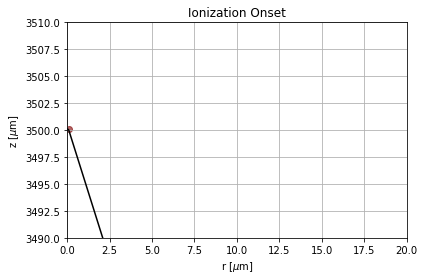

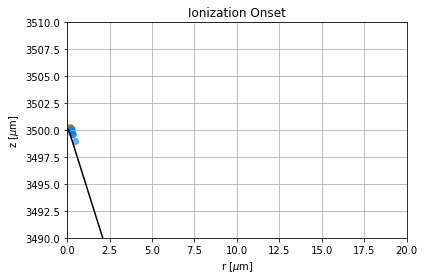

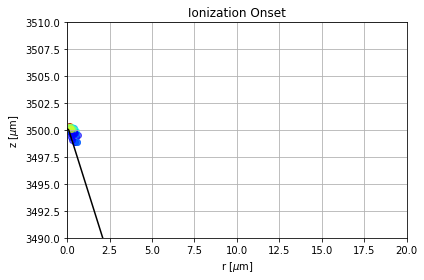

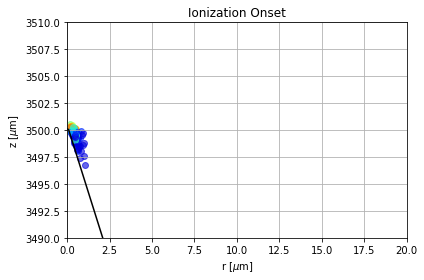

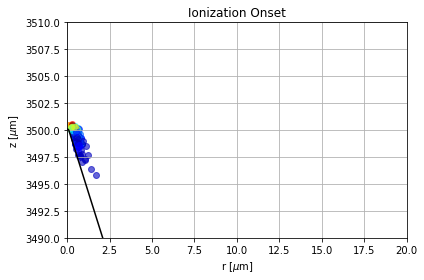

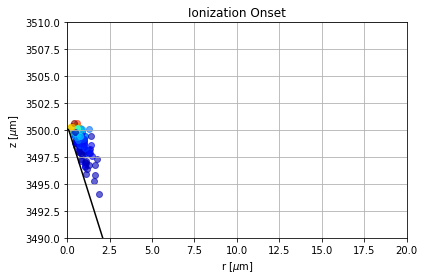

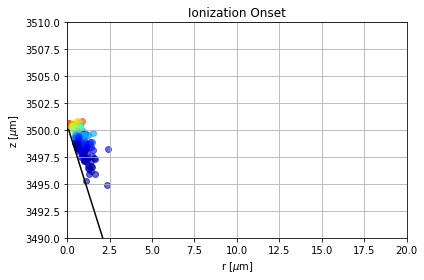

In [3]:
file_tree = {}

v_per_cm_100 = []
mult_factor_100 = []

for file in glob.glob('lar-amplification/100nm-tip/*.txt'):
    key = int(re.search(r'(\d*)(?:V)', file).group(1))
    if (key in file_tree):
        file_tree[key].append(file)
    else:
        file_tree[key] = [file]

for key, value in sorted(file_tree.items()):
    group = Graph(value, smooth=False, cutoff=0.01, order=3)

    ionization_list = []
    
    for k in range(group.n):
        ionization_list.append(group.ionized[k][-1])

    max_ionized = np.max([k[-1] for k in group.ionized])
    
    v_per_cm_100.append(key)
    mult_factor_100.append(2**np.mean(ionization_list))
    
    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))
    
    for k in range(group.n):
        if int(group.ionized[k][-1]) != 0:
            index = np.where(group.ionized[k] == 0)[0][-1]
            plt.scatter(np.sqrt(group.y[k][index]**2 + group.z[k][index]**2), group.x[k][index], color=cm.jet(group.ionized[k][-1] / max_ionized), alpha=0.6)
        
    plt.xlim(0, 20)
    plt.ylim(3490, 3510)
    
    plt.xlabel('r [$\mu$m]')
    plt.ylabel('z [$\mu$m]')
    plt.title(f'Ionization Onset')
    
    plt.plot([-1e-4 * 1e6, -1e-7 * 1e6, -0.5e-7 * 1e6, 0, 0.5e-7 * 1e6, 1e-7 * 1e6, 1e-4 * 1e6], [3e-3 * 1e6, 3.5e-3 * 1e6, (3.5e-3 + 0.866025404e-7) * 1e6, (3.5e-3 + 1e-7) * 1e6, (3.5e-3 + 0.866025404e-7) * 1e6, 3.5e-3 * 1e6, 3e-3 * 1e6], color='0.0')
    
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # plt.savefig(f'ion_onset_100_{key}.pdf', bbox_inches='tight')

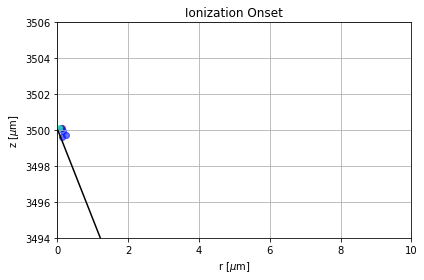

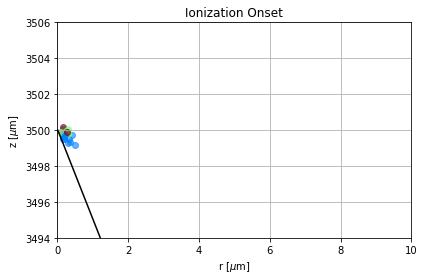

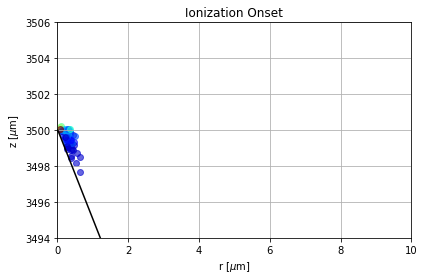

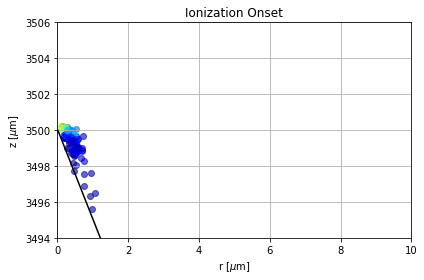

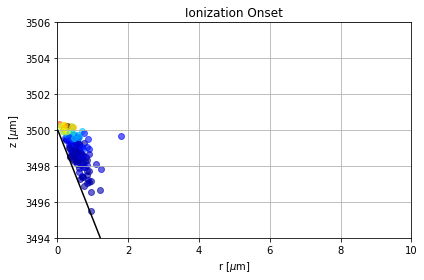

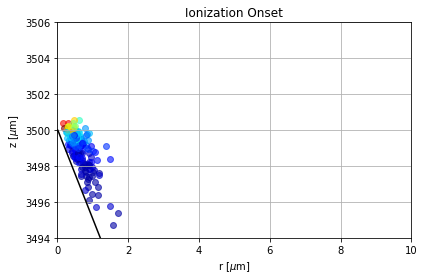

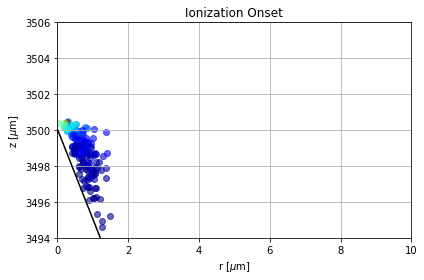

In [4]:
file_tree = {}

v_per_cm_10 = []
mult_factor_10 = []

for file in glob.glob('lar-amplification/10nm-tip/*.txt'):
    key = int(re.search(r'(\d*)(?:V)', file).group(1))
    if (key in file_tree):
        file_tree[key].append(file)
    else:
        file_tree[key] = [file]

for key, value in sorted(file_tree.items()):
    group = Graph(value, smooth=False, cutoff=0.01, order=3)

    ionization_list = []
    
    for k in range(group.n):
        ionization_list.append(group.ionized[k][-1])

    max_ionized = np.max([k[-1] for k in group.ionized])
    
    v_per_cm_10.append(key)
    mult_factor_10.append(2**np.mean(ionization_list))
    
    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))
    
    for k in range(group.n):
        if int(group.ionized[k][-1]) != 0:
            index = np.where(group.ionized[k] == 0)[0][-1]
            plt.scatter(np.sqrt(group.y[k][index]**2 + group.z[k][index]**2), group.x[k][index], color=cm.jet(group.ionized[k][-1] / max_ionized), alpha=0.6)
        
    plt.xlim(0, 10)
    plt.ylim(3494, 3506)
    
    plt.xlabel('r [$\mu$m]')
    plt.ylabel('z [$\mu$m]')
    plt.title(f'Ionization Onset')
    
    plt.plot([-1e-4 * 1e6, -1e-8 * 1e6, -0.5e-8 * 1e6, 0, 0.5e-8 * 1e6, 1e-8 * 1e6, 1e-4 * 1e6], [3e-3 * 1e6, 3.5e-3 * 1e6, (3.5e-3 + 0.866025404e-8) * 1e6, (3.5e-3 + 1e-8) * 1e6, (3.5e-3 + 0.866025404e-8) * 1e6, 3.5e-3 * 1e6, 3e-3 * 1e6], color='0.0')
    
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # plt.savefig(f'ion_onset_10_{key}.pdf', bbox_inches='tight')

The cell below plots charge amplification as a function of bulk field strength.

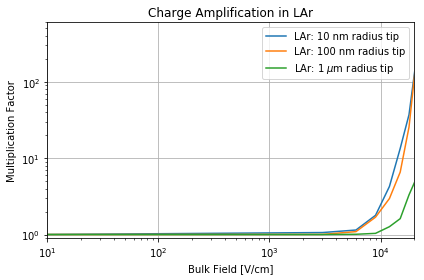

In [5]:
# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
# fig = plt.figure(figsize=(6, 6))

plt.plot(np.insert(v_per_cm_10, 0, 10), np.insert(mult_factor_10, 0, 1), label='LAr: 10 nm radius tip')
plt.plot(np.insert(v_per_cm_100, 0, 10), np.insert(mult_factor_100, 0, 1), label='LAr: 100 nm radius tip')
plt.plot(np.insert(v_per_cm_1000, 0, 10), np.insert(mult_factor_1000, 0, 1), label='LAr: 1 $\mu$m radius tip')

plt.xlabel("Bulk Field [V/cm]")
plt.ylabel("Multiplication Factor")
plt.title('Charge Amplification in LAr')

plt.yscale('log')
plt.xscale('log')

plt.xlim(1e1, 2e4)
plt.ylim(0.9, 6e2)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# plt.savefig('lar_charge_amp.pdf', bbox_inches='tight')

To better compare GAr and LAr charge amplification, the below two cells load GAr charge amplification data and plot both phenomena side-by-side, respectively.

In [7]:
folder_list = [10, 13, 17, 23, 30, 40, 53, 70, 93, 123, 162, 214, 283, 375, 496, 655, 866, 1145, 1513, 2000]
pressure_list = [2, 7, 15]

v_per_cm = [[], [], []]
mult_factor = [[], [], []]

for i, p in enumerate(pressure_list):
    for folder in folder_list:
        file_tree = {}

        for file in glob.glob(f'gar-amplification/{p}/{folder}/*.txt'):
            key = int(re.search(r'(\d*)(?:V)', file).group(1))
            if (key in file_tree):
                file_tree[key].append(file)
            else:
                file_tree[key] = [file]

        for key, value in sorted(file_tree.items()):
            group = Graph(value, smooth=False, cutoff=0.01, order=3)

            ionization_list = []
    
            for k in range(group.n):
                ionization_list.append(group.ionized[k][-1])

            v_per_cm[i].append(key)
            mult_factor[i].append(2**np.mean(ionization_list))

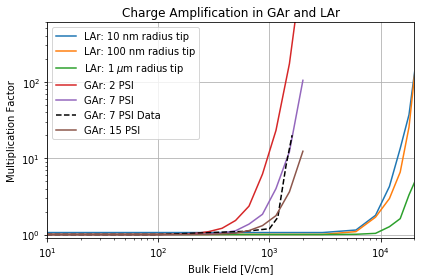

In [8]:
# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
# fig = plt.figure(figsize=(12, 5))

plt.plot(np.insert(v_per_cm_10, 0, 0), np.insert(mult_factor_10, 0, 1), label='LAr: 10 nm radius tip')
plt.plot(np.insert(v_per_cm_100, 0, 0), np.insert(mult_factor_100, 0, 1), label='LAr: 100 nm radius tip')
plt.plot(np.insert(v_per_cm_1000, 0, 0), np.insert(mult_factor_1000, 0, 1), label='LAr: 1 $\mu$m radius tip')

for i, p in enumerate(pressure_list):
    plt.plot(v_per_cm[i], mult_factor[i], label=f'GAr: {p} PSI')
    if p == 7:
        plt.plot([1, 1e2, 6e2, 1e3, 1.19e3, 1.41e3, 1.6e3], [1, 1, 1.1, 1.19, 1.68, 8, 20], 'k--', label='GAr: 7 PSI Data')

plt.xlabel("Bulk Field [V/cm]")
plt.ylabel("Multiplication Factor")
plt.title('Charge Amplification in GAr and LAr')

plt.yscale('log')
plt.xscale('log')

plt.xlim(1e1, 2e4)
plt.ylim(0.9, 6e2)

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# plt.savefig('lar_gar_charge_amp.pdf', bbox_inches='tight')